In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [6]:
page1 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating")
page2 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt")
page3 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt")
page4 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt")
page5 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt")
pages = [page1, page2, page3, page4, page5]

In [7]:
from scrapp_refacto import *
movies

,Titre,Année,Score,Réalisateur,Votes,Recette
0,Les Évadés,1994,9.3,Frank Darabont,2384498,"28,341,469"
1,Le parrain,1972,9.2,Francis Ford Coppola,1652566,"134,966,411"
2,The Dark Knight : Le Chevalier noir,2008,9.0,Christopher Nolan,2347962,"534,858,444"
3,"Le parrain, 2ème partie",1974,9.0,Francis Ford Coppola,1149888,"57,300,000"
4,12 Hommes en colère,1957,9.0,Sidney Lumet,704057,"4,360,000"
...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,Frank Capra,108451,"9,600,000"
246,Autant en emporte le vent,1939,8.1,Victor Fleming,293981,"198,676,459"
247,New York - Miami,1934,8.1,Frank Capra,95754,"4,360,000"
248,La passion de Jeanne d'Arc,1928,8.1,Carl Theodor Dreyer,48981,"21,877"


In [9]:
movies.Titre = movies.Titre.astype(str).astype(str)
movies.Année = movies.Année.astype(str).astype(int)
movies.Score = movies.Score.astype(str).astype(float)
movies.Réalisateur = movies.Réalisateur.astype(str).astype(str)
movies.Votes = movies.Votes.astype(str).astype(int)
movies.Recette = movies.Recette.astype(str)
movies.Recette = movies.Recette.apply(lambda x: x.replace(",", ""))
movies.Recette = movies.Recette.astype(str).astype(int)
movies.isnull().sum(axis=0)


Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
dtype: int64

In [10]:
df_sort_by_recette = movies.sort_values('Recette', ascending=False)
df_sort_by_recette


,Titre,Année,Score,Réalisateur,Votes,Recette
56,Avengers: Endgame,2019,8.4,Anthony Russo,865101,858373000
57,Avengers: Infinity War,2018,8.4,Anthony Russo,871231,678815482
2,The Dark Knight : Le Chevalier noir,2008,9.0,Christopher Nolan,2347962,534858444
60,The Dark Knight Rises,2012,8.4,Christopher Nolan,1540637,448139099
41,The Lion King,1994,8.5,Roger Allers,958633,422783777
...,...,...,...,...,...,...
98,Requiem pour un massacre - Va et regarde,1985,8.3,Elem Klimov,62166,0
173,Silent Voice,2016,8.1,Naoko Yamada,53141,0
85,Mon père et mon fils,2005,8.3,Çagan Irmak,80653,0
84,The Father,2020,8.3,Florian Zeller,49184,0


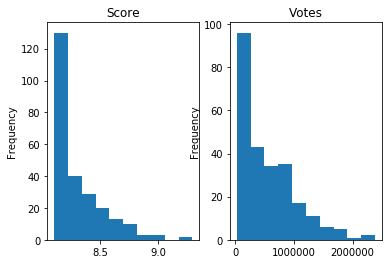

In [11]:
fig, ax =plt.subplots(1,2)

movies.Score.plot(kind='hist', bins=10, ax=ax[0], title='Score')
movies.Votes.plot(kind='hist', bins=10, ax=ax[1], title='Votes');

In [12]:
mean_score = movies.Score.mean()
mean_score


8.301199999999971

In [13]:
mean_recette = movies.Recette.mean()
mean_recette

75047956.968

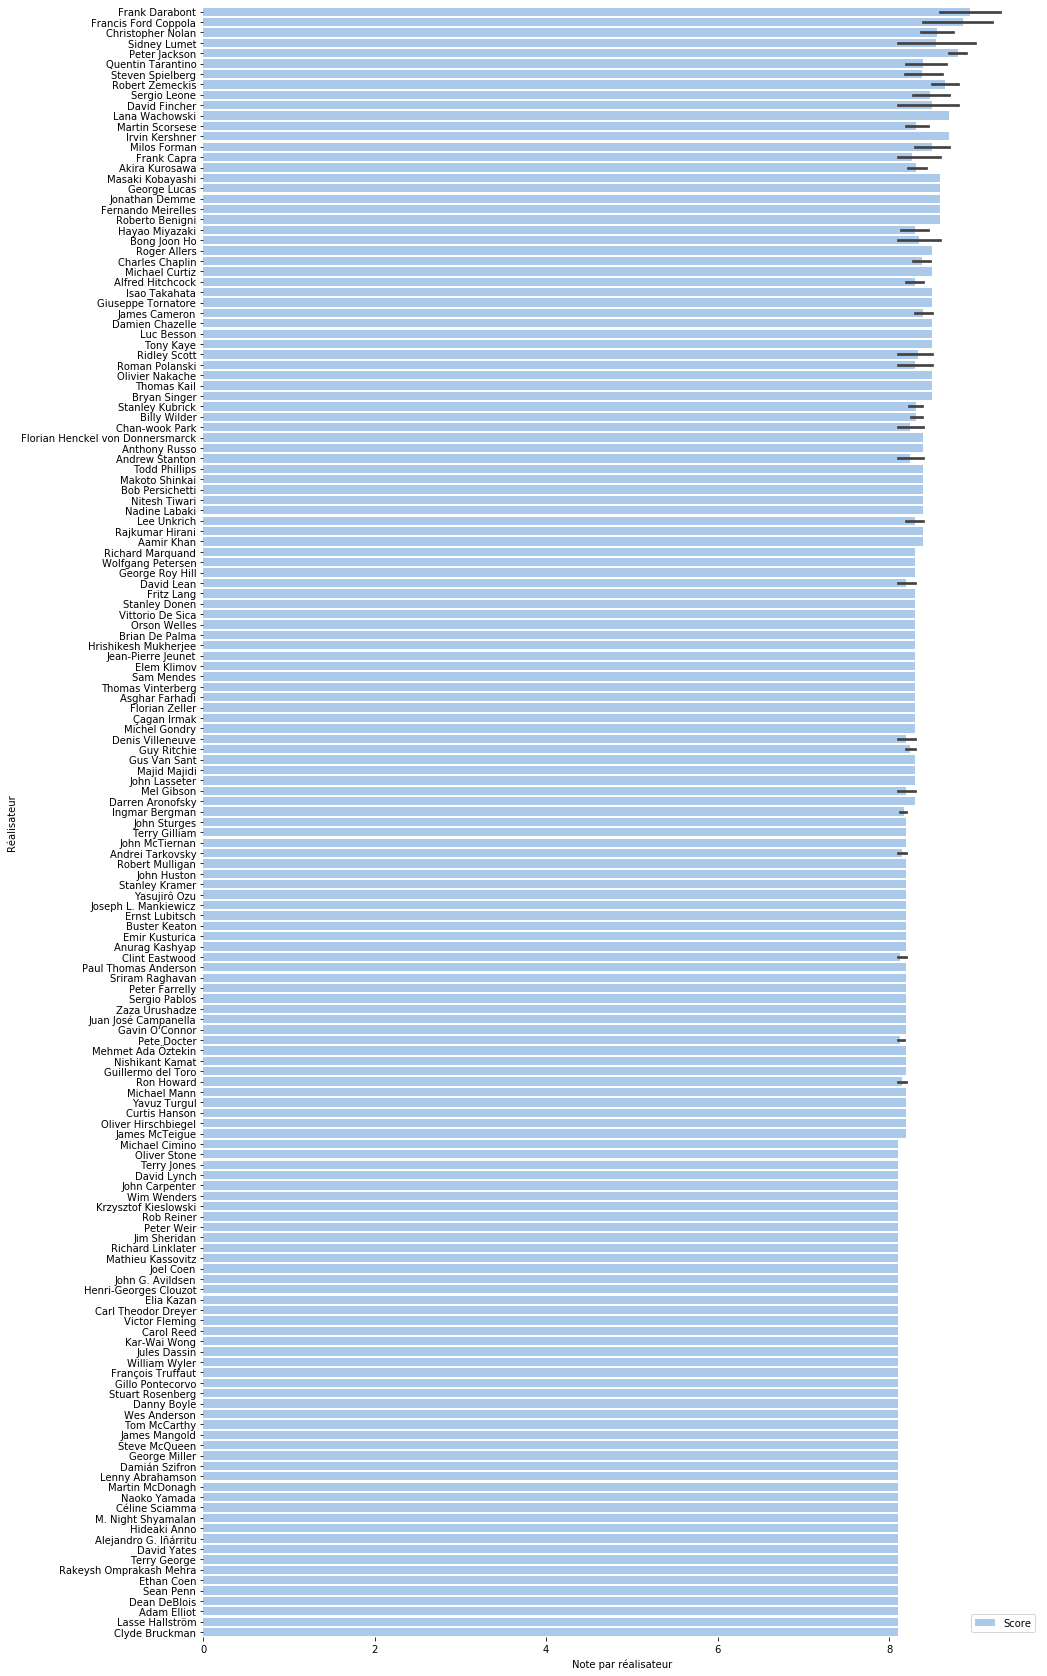

In [14]:
f, ax = plt.subplots(figsize=(15, 30))
classement = movies.sort_values("Score", ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x="Score", y="Réalisateur", data=classement, label="Score", color="b")
ax.legend(ncol=2, loc="lower right")
ax.set(xlabel="Note par réalisateur")
sns.despine(left=True, bottom=True)


In [15]:
movies[['Réalisateur', 'Score']].groupby('Score').count()

,Réalisateur
Score,
8.1,78
8.2,52
8.3,40
8.4,29
8.5,20
8.6,13
8.7,5
8.8,5
8.9,3


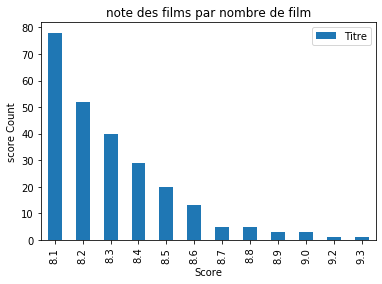

In [16]:
movies[['Titre', 'Score']].groupby('Score').count().plot(kind='bar', title='note des films par nombre de film')
plt.xlabel('Score')
plt.ylabel('score Count');